# GEQIE QUALPI Example

## Setup

### Imports

In [9]:
import numpy as np
from PIL import Image, ImageOps

import matplotlib.pyplot as plt

In [10]:
import geqie
from geqie.encodings import qualpi

## Encoding

### Opening the image

Opening the test image.

In [11]:
image = Image.open("../../assets/test_images/grayscale/test_image.png")
image = ImageOps.grayscale(image)
image = np.asarray(image)
image

array([[255, 192],
       [128,  64]], dtype=uint8)

## Please, note the fact, that you need to convert from polar to cartesian coordinate system.

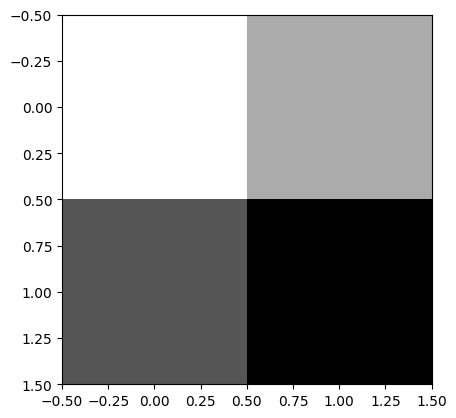

In [12]:
plt.imshow(image, cmap="gray")

### Encoding using unitary gate

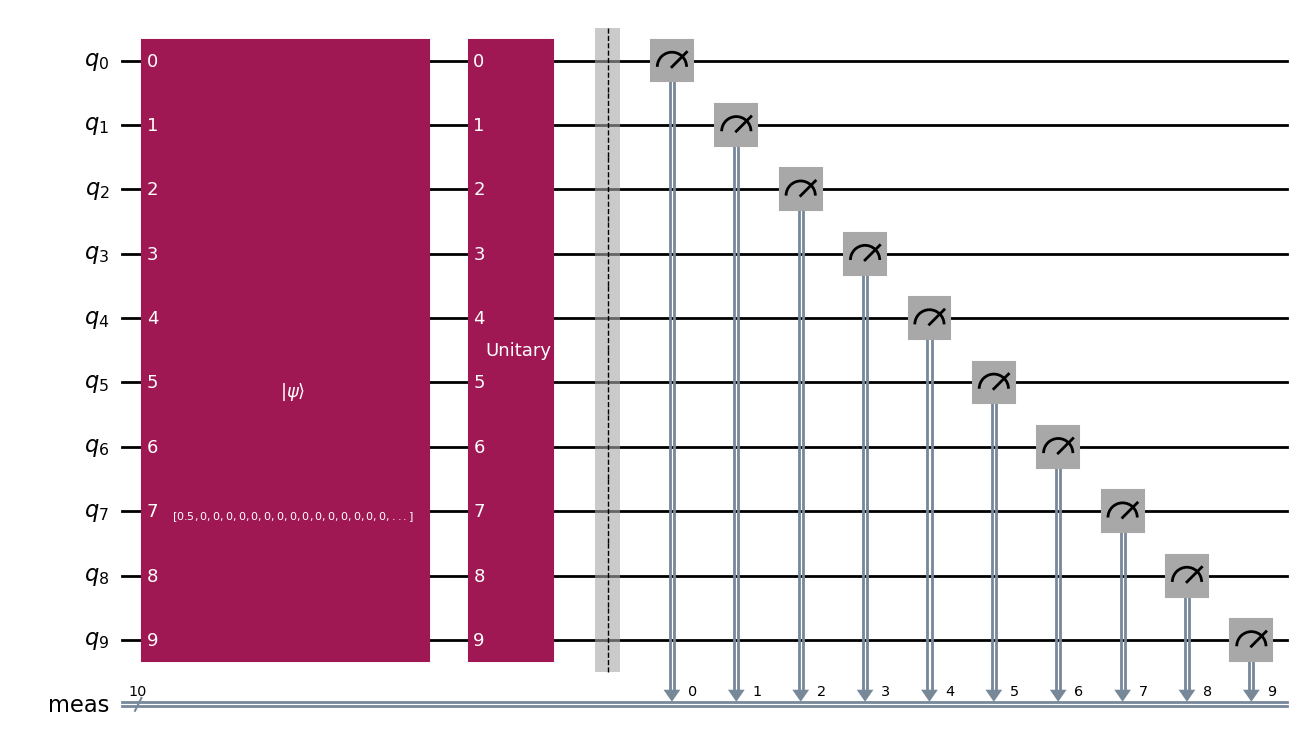

In [13]:
circuit = geqie.encode(qualpi.init_function, qualpi.data_function, qualpi.map_function, image)
circuit.draw(output="mpl")

### Simulating the circuit

In [14]:
result = geqie.simulate(circuit, 1000)
result

{'0011111111': 256, '1010000000': 254, '1101000000': 236, '0111000000': 254}

## Interpretation of the results

Total state $\ket{\psi}$ is equal to:
$$\ket{\psi} = \ket{\theta}\otimes\ket{\rho}\otimes\ket{color}^{\otimes 8}$$
Where:
- $\rho = \log_{\text{base}} \sqrt{(x - x_c)^2 + (y - y_c)^2}$,
- $\theta = \tan^{-1} \frac{y - y_c}{x - x_c}$,
- $x_c$, and $y_c$ correspond to central pixel possition;
- Last 8 qubits corresponds to color intensity, for example: $77 = \ket{01001101}$ (corresponds to $2^6+2^3+2^2+2^0$).

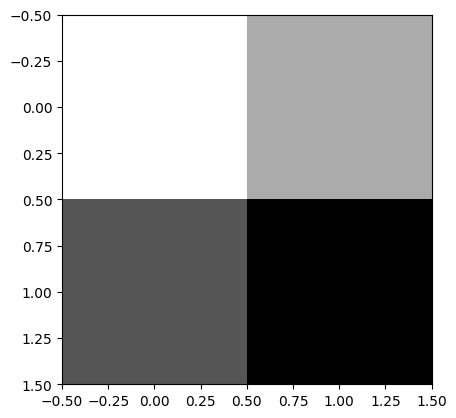

In [15]:
retrieved_image = qualpi.retrieve_function(result)
plt.imshow(retrieved_image, cmap="gray")
plt.show()

### Reconstructed image

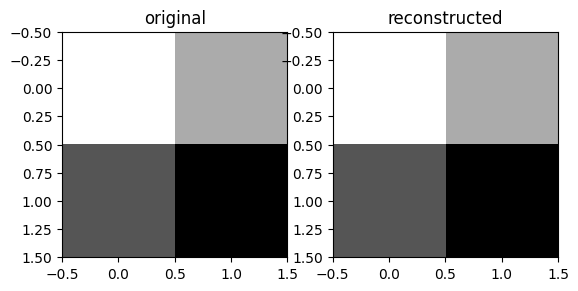

In [16]:
f = plt.figure()
gs = f.add_gridspec(1, 2)

ax = f.add_subplot(gs[0, 0])
ax.set_title("original")
ax.imshow(image, cmap="gray")

ax = f.add_subplot(gs[0, 1])
ax.set_title("reconstructed")
ax.imshow(retrieved_image, cmap="gray")